# Homework 5 Step 1

## Gradient Descent with Adaline

Here we will use gradient descent to implement the ADAptive LInear NEuron (Adaline), a variant of the perceptron used in artificial neural nets (Widrow et al, 1960).  During training, Adaline uses a continuous-valued linear activation function, (wTx)=wTx, to compute the model error and update the weights.

We’ll be using the very popular Iris dataset from the UC Irvine Machine Learning Dataset Repository:

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [1]:
import pandas as pd

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                     header=None,\
                     names=['sepal_length','sepal_width','petal_length','petal_width','class'])


In [2]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set the training classes
y = iris_df.iloc[0:150, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)


## Step 1.3

In [5]:
# Replace this with data from the DataFrame
X = np.empty((len(iris_df), 2))
X[:,0] = np.array(iris_df['sepal_length'])
X[:,1] = np.array(iris_df['petal_length'])

In [6]:
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

## Plot the results of our input (X) and classes (y)

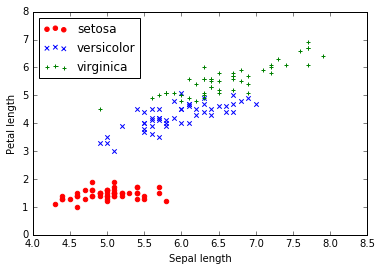

In [7]:
# Class Iris-Setosa is rows 0-49
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

# Class Iris-Versicolor is rows 50-99
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# Class Iris-Virginica is the rest
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='+', label='virginica')

plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

## Step 1.4. The Real Work Begins...

Below we have an instance of a Python _class_, which is basically a self-contained module with its own functions (sometimes called _methods_) and data.

In [8]:
# Derived from adaline learner in Python Machine Learning book, 
# by Rascka, published by Packt.
class Adaline(object):
    # Initialization of the Adaline object.
    #
    # learn_rate: float - learning rate, between 0.0 and 1.0
    # n_iter: int, passes over training dataset.
    def __init__(self, learn_rate=0.01, n_iter=50):
        self.learn_rate = learn_rate
        self.n_iter = n_iter

    # Main function:  Train to match a dataset
    #
    # X: input training data, {array-like}, shape = [samples, features]
    # y: input training classes, array-like, shape = [samples] 
    def fit(self, X, y):
        # Weight vector = baseline + weight for each dim
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        # Do gradient descent on the parameters, according to the error in the
        # activation function!
        self.cost_ = self.grad_desc(X, y, self.w_, self.learn_rate, self.n_iter)
            
        return self
    
    # Compute the Adaline activation function, which is a dot
    # product of weight * data + baseline
    def activation(self, X, weights):
        return np.dot(X, weights[1:]) + weights[0]
    
    # Make a prediction about a class, which uses the activation function
    # and determines if it's larger or smaller than 0
    def predict(self, X):
        # Return class label after "unit step function"
        return np.where(self.activation(X, self.w_) >= 0.0, 1, -1)

    ### "Bias" (baseline adjustment) should be based on learning rate
    ### and overall error
    def get_baseline_gradient(self, data, errors, learn_rate):
        return learn_rate * errors.sum()
    
    #################
    ### Students fill in details in the next 3 functions!!!
            
    ### 1. Cost should be sum of squared error / 2
    def get_cost(self, errors):
        return sum(map(lambda x: pow(x,2), errors)) / 2  # TO DO: fix this
    
    ### 2. Gradient should be partial derivative of sum-squared error,
    ###    which is based on the dot product of weight and data (taking into
    ###    account the learning rate)
    def get_weight_gradient(self, X, errors, learn_rate):
        return learn_rate * X.T.dot(errors)  # TO DO: fix this
    
    # Gradient descent over sum of squared error.
    # 
    #
    # self: this passes in access to the Adaline "object" so you can call
    #       self.activation()
    #
    # X:           the X dataset (features)
    # y:           the gold-standard training classes
    # weights:     the vector of weights, one per feature in _data_, plus one more
    #              (weights[0]) representing the global baseline / "bias" for all of the data
    #              you can use weights[1:] for the feature weights as in _activation_ above
    # learn_rate:  the learning rate for the gradient descent (we called it alpha
    #              in the slides)
    # iterations:  the number of iterations to run the gradient descent
    #
    # Return a list of costs (Sum of Squared Error divided by 2) from each
    # iteration
    def grad_desc(self, X, y, weights, learn_rate, iterations):
        costs = []
        for i in range(iterations):
            # Compute 'activation' and error
            errors = y - self.activation(X, weights) # TO DO: fix this based on y
            
            # Update the weights of the features by the gradient
            weights[1:] += self.get_weight_gradient(X, errors, learn_rate)
            # and the weight of the baseline/bias by the cumulative gradient
            weights[0] += self.get_baseline_gradient(X, errors, learn_rate)

            cost = self.get_cost(errors) # TO DO: Compute the cost (SSE / 2) instead of 0!
            costs.append(cost)

        return costs


## Create an Adaline learner



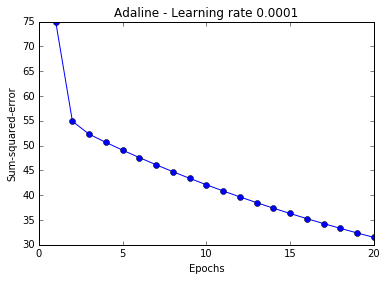

In [9]:
ada = Adaline(n_iter=20, learn_rate=0.0001).fit(X,y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')

plt.show()

## Step 1.4 Results

In [10]:
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

In [11]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
ada.predict(X)

array([-1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Yes

In [13]:
ada = Adaline(n_iter=20, learn_rate=0.001).fit(X,y)

In [14]:
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

In [15]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
ada.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

No